In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.feature_selection import r_regression

In [2]:
df=sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


##### Lets do chi-square-test on smoker & sex to find out if they are independent:

In [5]:
# crosstab will show me the frequency table of both feature
table=pd.crosstab(df["sex"],df["smoker"])
table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [10]:
# Observed Values
Observerd_Values=table.values
print("Observer Values\n",Observerd_Values)
# print(type(Observerd_Values))

Observer Values
 [[60 97]
 [33 54]]


In [52]:
# Using chi2_contigency we get the expected frequency 
# We get also p-value and degree of freedom
chi2, p, dof, expected=st.chi2_contingency(table)
print(f"Chi-Quadrat Statistik: {chi2}")
print(f"p-Wert: {p}")
print(f"Freiheitsgrade: {dof}")
print(f"Erwartete Werte:\n{expected}")
# chi-Quadrat Statistik=0 => Ein Wert  von 0 deutet darauf hin
# dass zischen obs & 

Chi-Quadrat Statistik: 0.0
p-Wert: 1.0
Freiheitsgrade: 1
Erwartete Werte:
[[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


statistic=0.0: Dies ist der Wert der Chi-Quadrat-Statistik. Ein Wert von 0.0 deutet darauf hin, dass zwischen den beobachteten und den erwarteten Häufigkeiten kein Unterschied besteht. Je höher dieser Wert, desto unwahrscheinlicher ist es, dass die beobachteten Abweichungen zufällig sind

In [32]:
no_of_rows=table.shape[0]
no_of_cols=table.shape[1]
degree_of_freedom=(no_of_rows-1)*(no_of_cols-1)
print(f"Degree of freedom: {degree_of_freedom}")

Degree of freedom: 1


In [51]:
# Using .values  we can make a dataframe a numpy array
X = df[['sex', 'smoker']].values
X

array([['Female', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Female', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Female', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Female', 'No'],
       ['Male', 'No'],
       ['Female', 'No'],
       ['Male', 'No'],
       ['Female', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Female', 'No'],
       ['Female', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Female', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Female', 'No'],
       ['Female', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Female', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['Male', 'No'],
       ['M

In [14]:
X.shape

(244, 2)

##### Correlation zwischen den numerischen Variablen:

In [19]:
X=df[['total_bill', 'tip','size']]
matrix=X.corr()
matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


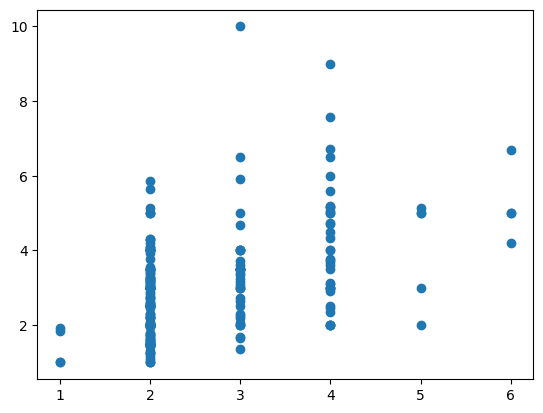

In [24]:
plt.scatter(df["size"],df["tip"])

<Axes: xlabel='total_bill', ylabel='tip'>

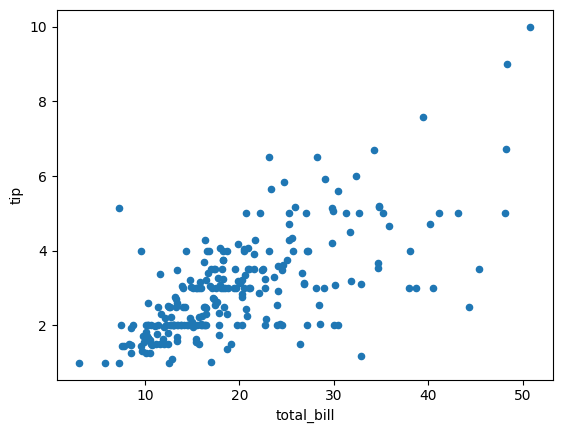

In [29]:
# We can do the plotting using df.plot.scatter in pandas
df.plot.scatter("total_bill","tip")

<Axes: >

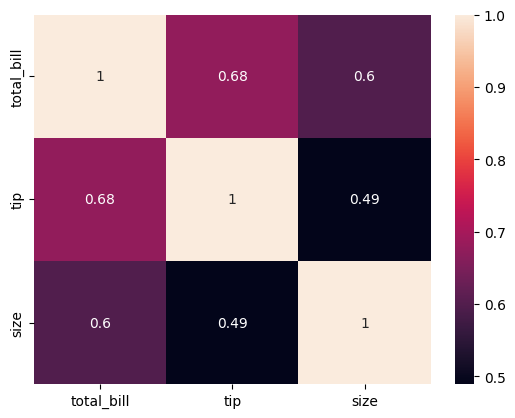

In [27]:
# We can give the heat-map to visualize the correlation
# annot=True to get the corr value
sns.heatmap(matrix,annot=True)

##### How to use the r_regression:

In [5]:
X=df[["size","total_bill"]]
y=df["tip"]
korr=r_regression(X,y)
korr

array([0.48929878, 0.67573411])